### Documentación

Problemas interesantes para Aprendizaje por refuerzo
 * Gymnasium: https://gymnasium.farama.org/environments/box2d/

## Instalación

!pip install gymnasium  
!pip install gymnasium[box2d] 

## Acciones adicionales

### En macos

pip uninstall swig  
xcode-select -—install (si no se tienen ya)  
pip install swig  / sudo port install swig-python
pip install 'gymnasium[box2d]' # en zsh hay que poner las comillas  

### en Windows

Si da error, se debe a la falta de la versión correcta de Microsoft Visual C++ Build Tools, que es una dependencia de Box2D. Para solucionar este problema, puede seguir los siguientes pasos:  
 * Descargar Microsoft Visual C++ Build Tools desde https://visualstudio.microsoft.com/visual-cpp-build-tools/.
 * Dentro de la app, seleccione la opción "Herramientas de compilación de C++" para instalar.
 * Reinicie su sesión en Jupyter Notebook.
 * Ejecute nuevamente el comando !pip install gymnasium[box2d] en la línea de comandos de su notebook.

In [ ]:
# prueba lunar lander por humano

import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="rgb_array")

import numpy as np
import pygame
import gymnasium.utils.play

lunar_lander_keys = {
    (pygame.K_UP,): 2,
    (pygame.K_LEFT,): 1,
    (pygame.K_RIGHT,): 3,
}
gymnasium.utils.play.play(env, zoom=3, keys_to_action=lunar_lander_keys, noop=0)

### Genetic Algorithm

Generación 0 Fitness -110.8024795619691
Mejor fitness:  -110.8024795619691  Cromosoma:  [0.8598910716067627, -0.5797896356292692, -0.9684841089195491, 0.6682965552975406, -0.06502268500394921, -0.7947602647758767, -0.7613558274847404, -0.9857022759506711, -0.5774343445592122, 1.0152139848560857, -0.2270601956566732, -0.05525143554028371, -0.8675780728854732, -0.45303581297777246, 0.02106775211317756, -0.8764088098041851, 0.5120848862019866, -0.9344193481082379, 0.9297003165163119, 0.2786359833416089, -0.6050948776960723, 0.11930570176680658, 0.27202802639688356, 0.23995936955850966, -0.471498823285784, 0.9290813483231852, -0.3049924231572646, 0.4175721238085064, 0.13656935665555744, 0.27837789793806483, 0.34293816805093646, -0.519399839882717, 1.0643878981631982, 1.0476872536780262, -0.3180670802966895, 0.924589631559506, 1.146429560219475, -0.7574244382355111, -0.39999109711275904, -0.8816557998431356, -0.9724432379592873, 0.4721338338863167, 0.4633158375835762, 0.4990117021751856, 0.

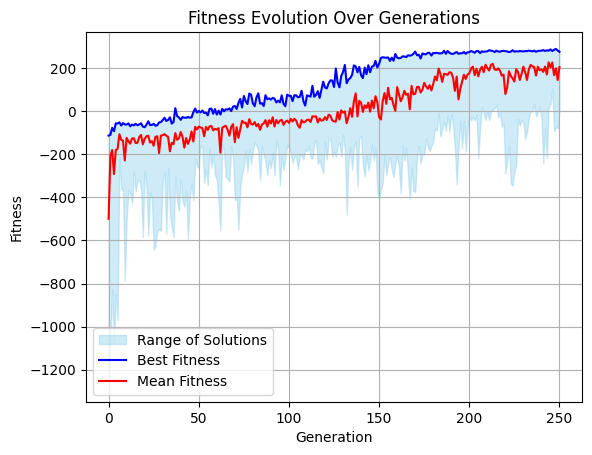

In [1]:
from GA import Genetic_Algorithm

GA = Genetic_Algorithm(N=100, pcross=0.5, pmut=0.6, sigma=0.1, n_tour=20, n_iter=250, num_exp=30, bounds=[-1, 1], verbose=True)
chromosome, fitness = GA.evolve()

### HP Tunning

In [10]:
N = [100]
pcross= [0.3, 0.4, 0.5]
pmut = [0.5, 0.6, 0.7]
n_iter= [150]
n_tour = [15, 20, 25]
sigma = [0.1]
num_exp = [25]
bounds = [[-2, 2]]

In [1]:
#Probar después
import math
N = [100]
pcross= [0.5, 0.6]
pmut = [0.6, 0.65]
n_iter= [150]
n_tour = [20]
sigma = [0.1]
num_exp = [25]
bounds = [[-2, 2], [-1, 1], [-math.pi, math.pi]]

In [ ]:
#! Probar a disminuir sigma a medida que avanza el experimento

In [2]:
from GA import Genetic_Algorithm

def run_experiment(combination, num_experiments=5):
    total_fitness = 0
    for _ in range(num_experiments):
        GA = Genetic_Algorithm(*combination, verbose=False)
        chromosome, fitness = GA.evolve()
        
        total_fitness += fitness

    total_fitness = total_fitness / num_experiments
    
    return total_fitness, combination, chromosome

In [3]:
import itertools
from concurrent.futures import ProcessPoolExecutor, as_completed

# Define el número de veces que cada configuración será ejecutada
num_experiments = 4


# Crear todas las combinaciones posibles de hiperparámetros
all_combinations = list(itertools.product(
    N, pcross, pmut, sigma, n_tour, n_iter, num_exp, bounds
))

# Almacenar los resultados
results = []

# Paralelizar la ejecución
with ProcessPoolExecutor() as executor:
    # Iniciar las ejecuciones en paralelo
    future_to_combination = {executor.submit(run_experiment, combination, num_experiments): combination for combination in all_combinations}

    total_combinations = len(all_combinations)
    completed_combinations = 0
    
    for future in as_completed(future_to_combination):
        total_fitness, combination, chromosome = future.result()
        results.append((total_fitness, combination, chromosome))

        completed_combinations += 1
        print(f"Combinación completada. Progreso: {completed_combinations}/{total_combinations}")
        print(f"Combinación de parámetros: {combination}")
        print(f"Fitness medio: {total_fitness}")
        print(f"Mejor individuo: {chromosome}")

Combinación completada. Progreso: 1/12
Combinación de parámetros: (100, 0.6, 0.65, 0.1, 20, 150, 25, [-2, 2])
Fitness medio: 28.3555042479419
Mejor individuo: [-1.107275405537366, 2.9663612083669038, 2.495558586982612, -2.6010920737908862, 1.6829800028121153, -1.4120043701051623, 1.7248543558685017, 2.700143765193783, -0.7186743303840258, -1.0197482577366985, 2.7068533936289843, -3.2363639220270666, -2.529270787534578, -3.661859923475826, 1.6584417553437767, 0.7370984553557784, 4.4339902590604945, 0.9858779318795124, 0.1910475885545555, -0.598236891721336, -0.8574909434341424, -2.5733639717083565, 0.9236300414290266, -1.3929572421470289, -1.7381868188678837, -0.5399289839270889, 0.15321613418645616, 2.02512738006459, -0.41393443600823543, 2.830693964510927, -2.613687822333938, -0.23840794812167668, -2.9669944601073945, 3.4434396790501762, -4.334903785744666, 1.1192589672186666, -0.11896104174641534, 2.6418021278200468, -0.3540876153135112, 0.11622036714766978, 0.2982865854821123, 2.714

### Test best result of GA

In [ ]:
from MLP import MLP

chromosome = [1.9573885177784547, 0.6280369733476319, -0.1662450021661512, -1.7834867424105687, -1.8527445949168804, -3.137670522603557, 0.06299378147475262, 1.5867607004550432, -2.2148929614703805, -2.317648179938988, 1.2254945887791142, -0.31005784643162326, 0.6540146982760968, 0.8977902648214572, 1.661256885338138, -2.179710128952965, 0.2644320178136332, -2.046469319409544, 0.7918417029283675, 4.515252180082156, -4.062588860257526, -6.250478592070897, 6.082826677783409, -1.782004498433076, -1.4369708793079277, -0.3936914347999277, -4.197132501292911, 3.227910755921221, 1.5537460110305643, 2.6767560119153293, 0.7675569125787575, -2.4789358215534842, -4.860538125741657, -0.5368279107102649, -1.0760153569376325, 3.049363081802306, -4.020668008132494, -2.8805972794246126, -1.4759795786663383, -0.8378429463332991, 1.7833544073780836, -0.2357519822942755, 3.1671866888976687, -2.229565702853178, 0.16134429965899963, -0.24580977672601598, -0.5251547729261355, -0.7096531064931221, 2.115003521696492, 1.6134085560218923, -0.2987652710687178, -1.337148498036292, -0.33475923468230684, -0.32521898442097213, 1.132695328905497, -1.9637854745126495, -1.0913227598775652, 1.2338654843068348, -2.0040223512022863, 1.1632827530864884, -2.708897242460119, -1.5720449613202288, 1.6076769331840466, 0.6469255159836462, 4.51126958918746, -1.2078764445458106, 0.9535708901871249, -1.7135791567415406, 2.4486210686226486, 2.046844619208981, 2.4163058587141473, -1.2363406289910817, -2.3160349553843425, -0.09939822431700389, 1.4723992586821384, -0.19201569272014832, -0.04790461193548458, 5.458322145312465, -0.9050037370081216, 2.4234571692121967, 0.4351602722816945, -1.6872580666866785]

model = MLP([8, 6, 4])

model.from_chromosome(chromosome)

# definir política
def policy (observation):
    s = model.forward(observation)
    action = np.argmax(s)
    return action

# prueba lunar lander por agente

import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")

def run ():
    #observation, info = env.reset(seed=42)
    observation, info = env.reset()
    ite = 0
    racum = 0
    while True:
        action = policy(observation)
        observation, reward, terminated, truncated, info = env.step(action)
        
        racum += reward

        if terminated or truncated:
            r = (racum+200) / 500
            print(racum, r)
            return racum

In [ ]:
while True:
    run()

#### ¿No has tenido bastante?

Prueba a controlar el flappy bird https://github.com/markub3327/flappy-bird-gymnasium

pip install flappy-bird-gymnasium

import flappy_bird_gymnasium  
env = gym.make("FlappyBird-v0")

Estado (12 variables):
  * the last pipe's horizontal position
  * the last top pipe's vertical position
  * the last bottom pipe's vertical position
  * the next pipe's horizontal position
  * the next top pipe's vertical position
  * he next bottom pipe's vertical position
  * the next next pipe's horizontal position
  * the next next top pipe's vertical position
  * the next next bottom pipe's vertical position
  * player's vertical position
  * player's vertical velocity
  * player's rotation

  Acciones:
  * 0 -> no hacer nada
  * 1 -> volar

In [ ]:
len(MLP([8, 6, 4]).to_chromosome())